In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
num=int(1e6)

## iid distribution addiction

In [59]:
x1=np.random.rand(num)
x2=np.random.rand(num)

(array([1.0010321 , 1.0048821 , 1.00018209, 0.99574208, 1.0036121 ,
        0.99750209, 1.0016721 , 0.99367208, 0.99648209, 1.0052421 ]),
 array([9.06754286e-07, 1.00000697e-01, 2.00000488e-01, 3.00000279e-01,
        4.00000069e-01, 4.99999860e-01, 5.99999651e-01, 6.99999441e-01,
        7.99999232e-01, 8.99999022e-01, 9.99998813e-01]),
 <BarContainer object of 10 artists>)

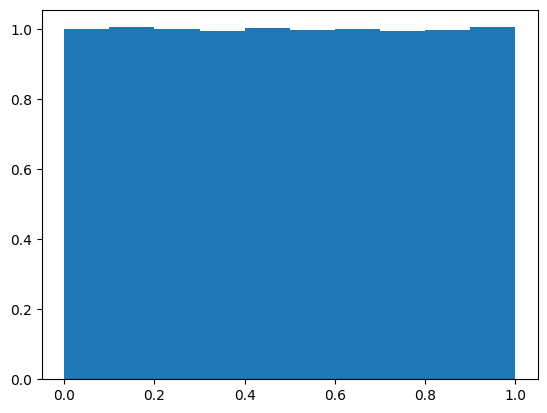

In [60]:
plt.hist(x1,density=True)

$X_1 ~ Uniform(0,1)$  
$X_2 ~ Uniform(0,1)$  
$Y=X_1+X_2=(X_1 * X_2)=tri(0,2)$

(array([0.10073064, 0.30210181, 0.50185604, 0.69592346, 0.89977259,
        0.89772014, 0.70148512, 0.50323769, 0.30051991, 0.10264793]),
 array([4.51607741e-04, 2.00212082e-01, 3.99972556e-01, 5.99733030e-01,
        7.99493504e-01, 9.99253978e-01, 1.19901445e+00, 1.39877493e+00,
        1.59853540e+00, 1.79829587e+00, 1.99805635e+00]),
 <BarContainer object of 10 artists>)

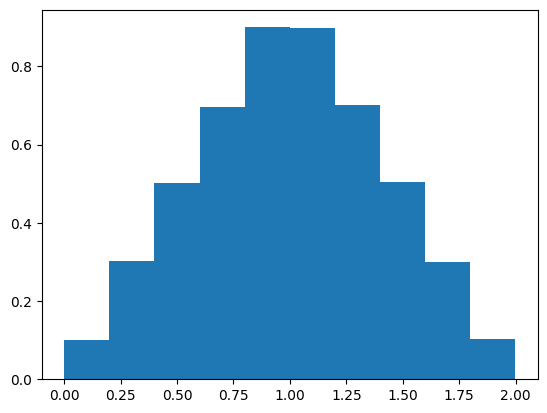

In [61]:
plt.hist(x1+x2,density=True)

In [62]:
from typing import Literal


def fftconvolve(x, y, mode: Literal['full', 'same', 'valid'] = 'full'):
    _len = {'full': len(x) + len(y) - 1,
            'same': max(len(x), len(y)),
            'valid': max(len(x), len(y)) - min(len(x), len(y)) + 1
            }
    # The full operation is taken first, post operation is taken for 'same' and 'valid' (for the signal boundary)
    length = _len['full']

    def _padding_zeros(arr):
        # padding the signals
        return np.pad(arr, (0, length - len(arr)), 'constant')
    _x_pad = _padding_zeros(x)
    _y_pad = _padding_zeros(y)
    c = np.fft.ifft(np.fft.fft(_x_pad)*np.fft.fft(_y_pad))
    if mode == 'full':
        return c.real
    if mode in ['same', 'valid']:
        start_index = int(np.floor((length-_len[mode])/2))
        return c[start_index: start_index + _len[mode]].real

In [63]:
conv_fft=fftconvolve(np.ones(num),np.ones(num),'full')

In [64]:
conv_fft

array([1., 2., 3., ..., 3., 2., 1.])

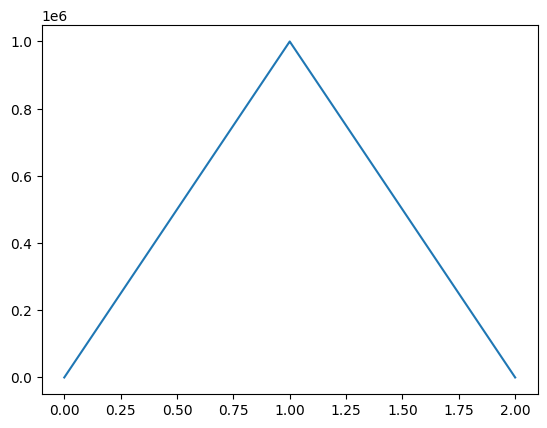

In [65]:
plt.plot(np.linspace(0,2,len(conv_fft)),conv_fft)
# plt.hist(x1+x2,density=True)
plt.show()

array([4.51607741e-04, 2.00212082e-01, 3.99972556e-01, 5.99733030e-01,
       7.99493504e-01, 9.99253978e-01, 1.19901445e+00, 1.39877493e+00,
       1.59853540e+00, 1.79829587e+00, 1.99805635e+00])

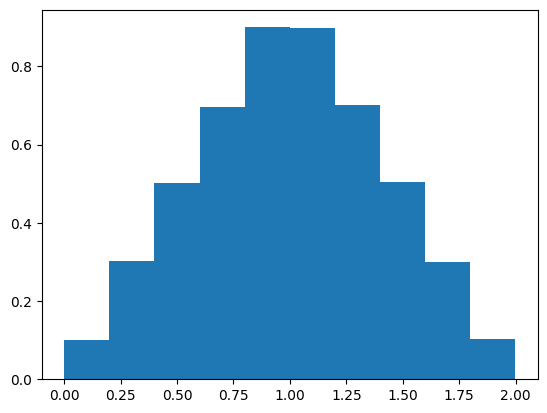

In [66]:
count,bins,_=plt.hist(x1+x2,density=True)
bins

In [67]:
bins[0]

0.0004516077414464803

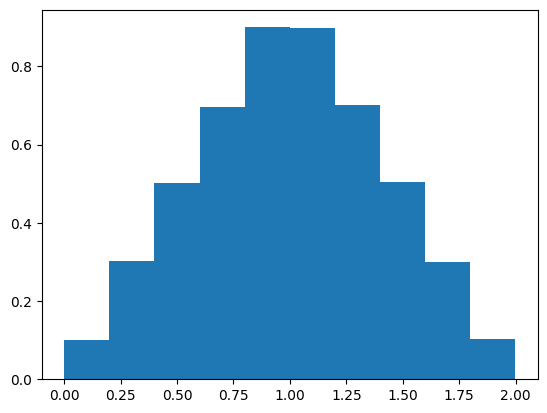

In [72]:
count,bins,_=plt.hist(x1+x2,density=True)
# plt.plot(np.linspace(bins[0],bins[-1],len(conv_fft)),conv_fft)
plt.show()

In [76]:
conv_fft[len(conv_fft)//2]

999999.9999999998

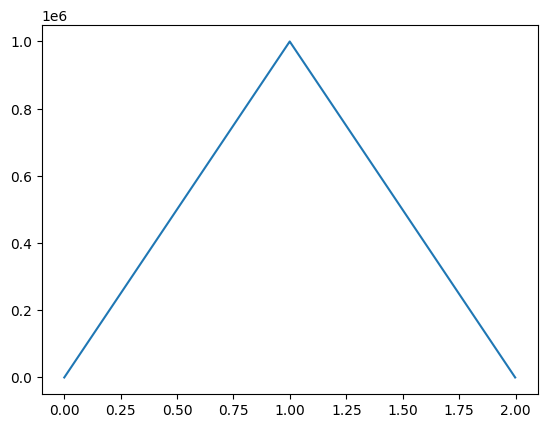

In [73]:
plt.plot(np.linspace(bins[0],bins[-1],len(conv_fft)),conv_fft)

$X_1 ~ Uniform(0,1)$  
$X_2 ~ N(0,1)$  
$Y=X_1+X_2$

In [69]:
# x1=np.random.rand(num)
# x2=np.random.randn(num)

In [70]:
# plt.hist(x1+x2,density=True)